### Exercise 1. Smith-Waterman

In [1]:
import numpy as np
import scipy as sc
import Bio as bio

In [35]:
def match(a,b, mu):
    if a == b:
        return -mu
    else:
        return mu

In [47]:
def smith_water(str1, str2, mu, gap, match:callable):
    #Computing matrix
    
    str1 = str1.upper()
    str2 = str2.upper()
    l1 = len(str1)
    l2 = len(str2)
    if l1 < l2:
        str1, str2 = str2, str1
        l1, l2 = l2, l1
    matrix = np.zeros((l1+1, l2+1))
    #k=1
    
    for i in range(1, l1+1):
        matrix[i][0] = 0
    
    for i in range(1, l2+1):
        matrix[0][i] = 0
    
    for i in range(1, l2+1):
        for j in range(1, l1+1):
            F_1 = matrix[j-1][i-1] + match(str1[j-1], str2[i-1], mu)
            F_2 = matrix[j-1][i] + gap
            F_3 = matrix[j][i-1] + gap
            matrix[j, i] = max(F_1, F_2, F_3, 0)
    
    #As matrix computed, we reach returning point
    
    algn1 = ''
    algn2 = ''
    arg_max = np.where(matrix == np.amax(matrix))
    a, b = arg_max[0][0], arg_max[1][0]
    #while matrix[a][b] != 0 and a != 0 and b != 0:
        #pass
    #print(a, b, matrix)
    algn_1 = ''
    algn_2 = ''
    for i in range(0, l1-l2):
        pass
    while a != 0 and b != 0:
        algn_2 += str2[b-1]
        algn_1 += str1[a-1]
        a, b = a-1, b-1
    while a != 0:
        algn_1 += str1[a-1]
        algn_2 += '-'
        a = a-1
    while b != 0:
        algn_2 += str2[b-1]
        algn_1 += '-'
        b = b-1
    algn_1, algn_2 = algn_1[::-1], algn_2[::-1]
    a, b = arg_max[0][0], arg_max[1][0]
    if l1-a > l2 - b:
        for i in range(0, l2-b):
            algn_2 += str2[b+i]
        for i in range(0, l1-a):
            algn_1 += str1[a+i]
        for i in range(0, l1-a - (l2 - b)):
            algn_2 += '-'
    else:
        for i in range(0, l2-b):
            algn_2 += str2[b+i]
        for i in range(0, l1-a):
            algn_1 += str1[a+i]
        for i in range(0, -(l1-a - (l2 - b))):
            algn_1 += '-'
    '''for x in range(0, len(str1)-a):
        algn_1 += str1[-x]
    for x in range(0, len(str2)-b):
        algn_2 += str2[-x]
        algn_1 += '-'
    while matrix[a][b]!=0:
        res = max(matrix[a-1][b-1], matrix[a-1][b], matrix[a][b-1])
        if res == matrix[a-1][b-1]:
            algn_1 += str1[a-1]
            algn_2 += str2[b-1]
            a, b = a-1, b-1
        if res == matrix[a-1][b]:
            algn_1 += str1[a-1]
            algn_2 += '-'
            a, b = a-1, b
        if res == matrix[a][b-1]:
            algn_2 += str2[b-1]
            algn_1 += '-'
            a, b = a, b-1
    #for x in range(0, len(str1)-len(algn_1)):
       # algn_1 += '-'
    #for '''
    return algn_1, algn_2

In [48]:
a1, a2 = smith_water('AABBAC', 'BBD', -1, -4, match)
print(a1)
print(a2)

AABBAC
--BBD-


In [49]:
#Запустил с gap = -0.4, чтобы были видны различия
a1, a2 = smith_water('SSTRARSS', 'HASMDTRARKKSS', -4, -10, match)
print(a1)
print(a2)

HASMDTRARKKSS
---SSTRARSS--


#### Exercise 2: Aphine gap

In [30]:
global init_e
global gap
global match
global mismatch
global infinity

init_gap   =  0.5
gap   =  -0.3
match = 1.
mismatch = -1.
infinity = -float("inf")

#return match or mismatch score
def match_2(s, t, i, j):
    if t[i-1] == s[j-1]:
        return match
    else:
        return mismatch

#initializers for matrices
def init_x(i, j):
    if i > 0 and j == 0:
        return infinity
    else:
        if j > 0:
            return init_gap + (gap * j)
        else:
            return 0

def init_y(i, j):
    if j > 0 and i == 0:
        return infinity
    else:
        if i > 0:
            return init_gap + (gap * i)
        else:
            return 0

def init_m(i, j):
    if j == 0 and i == 0:
        return 0
    else:
        if j == 0 or i == 0:
            return infinity
        else:
            return 0

In [35]:
def greek_pow(s, t):
    
    dim_i = len(t) + 1
    dim_j = len(s) + 1
    #abuse list comprehensions to create matrices
    X = [[init_x(i, j) for j in range(0, dim_j)] for i in range(0, dim_i)]
    Y = [[init_y(i, j) for j in range(0, dim_j)] for i in range(0, dim_i)]
    M = [[init_m(i, j) for j in range(0, dim_j)] for i in range(0, dim_i)]

    for j in range(1, dim_j):
        for i in range(1, dim_i):
            X[i][j] = max((init_gap + gap + M[i][j-1]), (gap + X[i][j-1]), (init_gap + gap + Y[i][j-1]))
            Y[i][j] = max((init_gap + gap + M[i-1][j]), (init_gap + gap + X[i-1][j]), (gap + Y[i-1][j]))
            M[i][j] = max(match_2(s, t, i, j) + M[i-1][j-1], X[i][j], Y[i][j])
    
    align1 = ''
    align2 = ''
    i = len(t)
    j = len(s)
    while (i>0 or j>0):
        #print(i,j)
        if (i > 0 and j > 0 and M[i][j] == M[i-1][j-1] + match_2(s, t, i, j)):
            align1 += s[j-1]
            align2 += t[i-1]
            i -= 1; j -= 1
        elif (i > 0 and M[i][j] == Y[i][j]):
            align1 += '_'
            align2 += t[i-1]
            i -= 1
        elif (j > 0 and M[i][j] == X[i][j]):
            align1 += s[j-1]
            align2 += '_'
            j -= 1
        if i == 0 and j > 0:
            align1 += s[j-1]
            align2 += '_'
            j -= 1
        if j == 0 and i > 0:
            align1 += '_'
            align2 += t[i-1]
            i -= 1
    align1_fin = ' '.join([align1[j] for j in range(-1, -(len(align1)+1), -1)])
    align2_fin = ' '.join([align2[j] for j in range(-1, -(len(align2)+1), -1)])

    return align1_fin, align2_fin

In [25]:
a1, a2 = greek_pow('TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC','AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC')
#string = 'init_gap ' + str(init_gap) + ', gap ' + str(gap) + ' match ' + str(match) + ' mismatch ' + str(mismatch)
print('init_gap ' + str(init_gap) + ', gap ' + str(gap) + ' match ' + str(match) + ' mismatch ' + str(mismatch))
print(a1)
print(a2)

init_gap 0, gap -1 match 1.0 mismatch -1.0
T _ _ _ _ C C _ C A G T _ _ T A T G T C A G G G G A C A C G A G C A T G _ C A G A G A C
A A T T G C C G C C G T C G T _ T T T C A _ _ _ G _ C A _ G _ T T A T G T C A G A _ T C


In [22]:
a1, a2 = greek_pow('TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC','AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC')
#string = 'init_gap ' + str(init_gap) + ', gap ' + str(gap) + ' match ' + str(match) + ' mismatch ' + str(mismatch)
print('init_gap ' + str(init_gap) + ', gap ' + str(gap) + ' match ' + str(match) + ' mismatch ' + str(mismatch))
print(a1)
print(a2)

init_gap -100, gap -0.01 match 1.0 mismatch -1.0
T C C C A G T T A T G T C A G G G G A C A C G A G C A T G C A G A G A C
A A T T G C C G C C G T C G T T T T C A G C A G T T A T G T C A G A T C


In [36]:
a1, a2 = greek_pow('TCCCAGTTATGTCAGGGGACACGAGCATGCAGAGAC','AATTGCCGCCGTCGTTTTCAGCAGTTATGTCAGATC')
#string = 'init_gap ' + str(init_gap) + ', gap ' + str(gap) + ' match ' + str(match) + ' mismatch ' + str(mismatch)
print('init_gap ' + str(init_gap) + ', gap ' + str(gap) + ' match ' + str(match) + ' mismatch ' + str(mismatch))
print(a1)
print(a2)

init_gap 0.5, gap -0.3 match 1.0 mismatch -1.0
T _ _ _ _ _ C C _ C A _ _ _ _ G T T A T G T C A G G G G A C A C G A G C _ _ A T G _ C A G A G A _ C
_ A A T T G C C G C _ C G T C G T T _ T _ T C A _ _ _ G _ _ _ C _ A G _ T T A T G T C _ _ A G A T C


### Exercise 3: Blasta

In [3]:

Alphabet = ['A', 'T', 'C', 'G']
integers = [1,2,3,4]

dict_1 = dict(zip(integers, Alphabet))
dict_1

{1: 'A', 2: 'T', 3: 'C', 4: 'G'}

In [ ]:
numbers = []

for i in range(40):
    numbers.append(random.randint(1,5))
    
seq = []
for i in range(len(numbers)):
    seq.append(dict_1[numbers[i]])
    
string = ''

for x in seq:
    string += x
    
print(string)

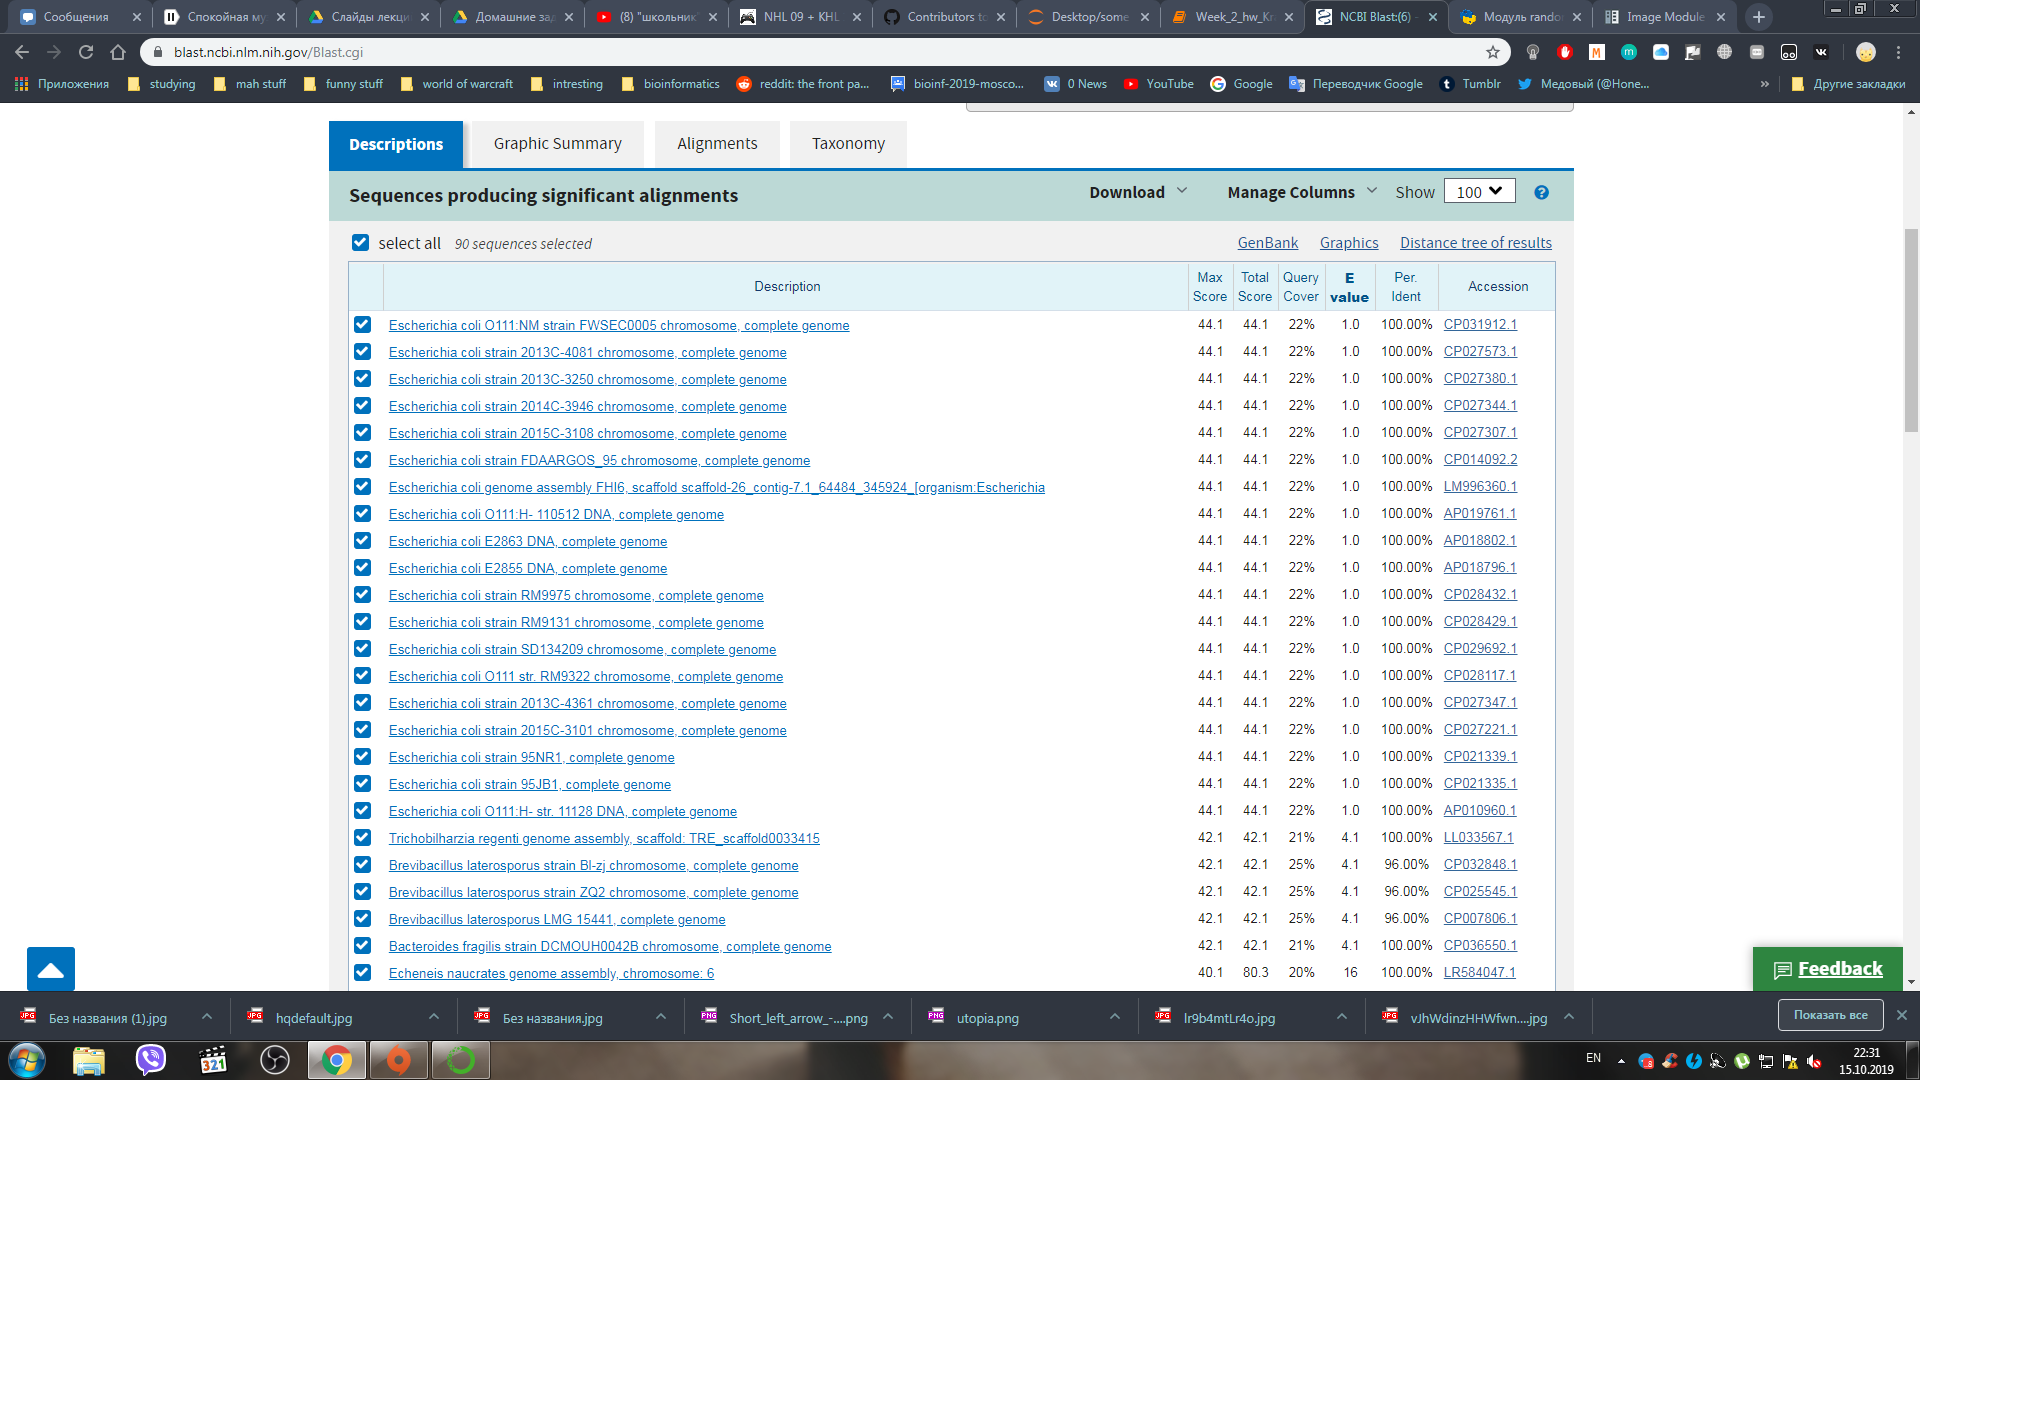

In [70]:
Seq_1 = 'CATATCATAGTCCCTAAATGCCATGGCATAACATCTGGTTCAAGTACCGGGCATCGGCATTATTCTTTTCTTGTGGCGATAACAGAGTGGCATGTGAGAC'

Image("seq1.png")

1000


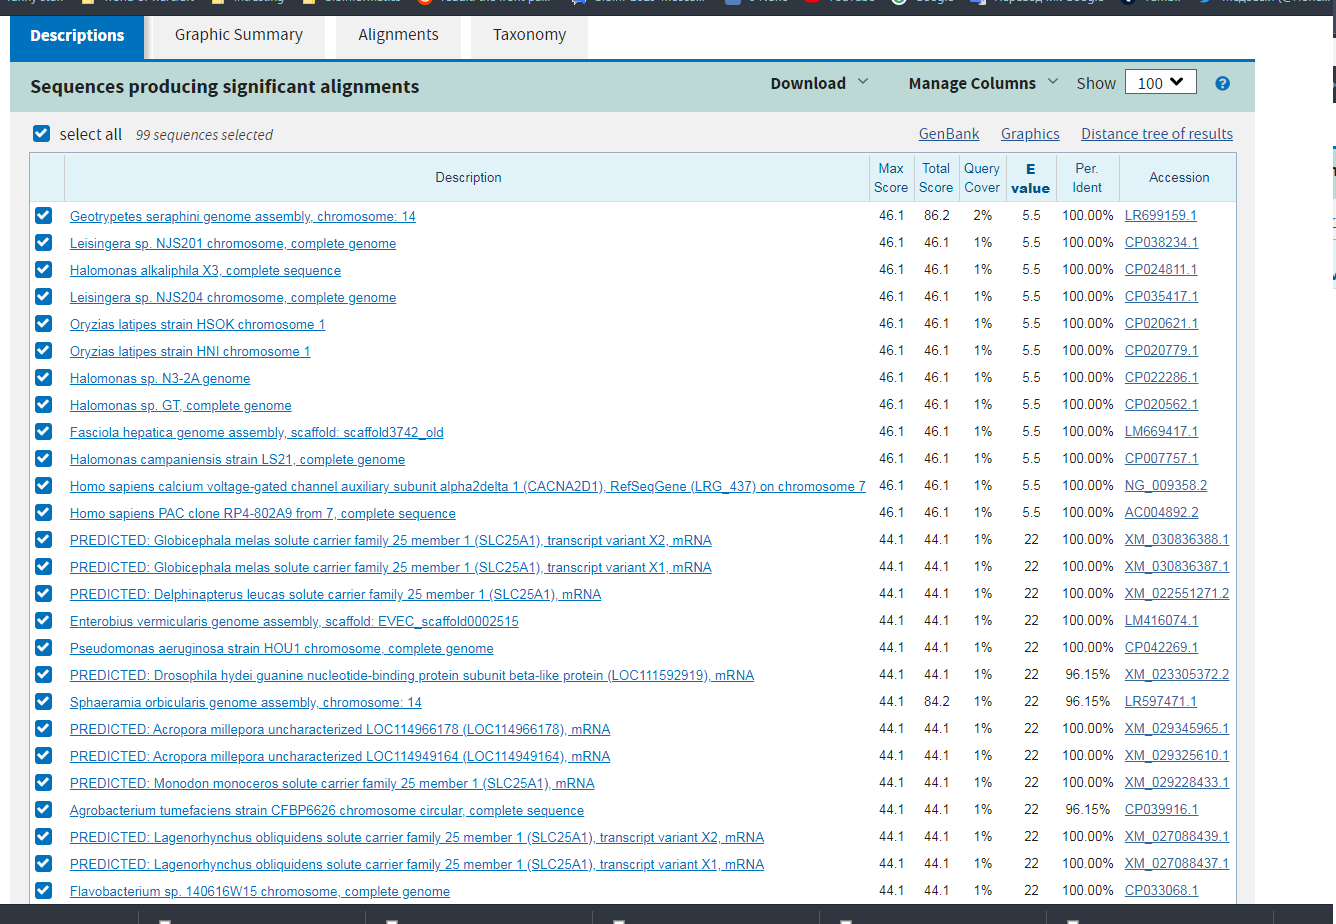

In [77]:
Seq_2 = 'CGGTAAGATTAAAATTACTTCTATTCCACATAGTAATATGGACGCAACAGTCTTGTAAAGAGAGTAGATATGTTACGTAGACTAGGGCTAGTTCCAATACGCTGAGAGGGATGCGATTATTTTGAGTGAGAGTACTTGTACTTTCCGTGACCTCGTCGCATTTCCTAGTCCACTCCGCAACAAGTCTCACTCCCCCTCCGACGATCAGTATATGAGTCTAACTTGGTGAACAATTGCCCGTATATACTTCGCGCGCCTTGAAGGTAAGCTCGCGGCGCCCACAAGAAAATACGCGCAAGAACGAGAGTAGACCATGCCAAAGTCCCGATGGATGCTCTTATGTTTCCATGCATCCCTGGTCCGAGTAGCTCTTCGTTGTCTGATTCAGACGAATCAATAGGACTGTCGAAACCTGTTGTATAAGACCCGGTTGTCTCGCATCTTGATGGCGGCGTGCTGTTCGGTTCCGCCGGCTAGCTGGATAAGTGGATGTAGTACTCATGGCCAGATACCCTTAGTCGCTTTTTCCGTGTGTAGCCGAGCGAGACTTCAACGGATCTAATGGTACGGTGGCGCTGCTTCGTGATTAAAGCCTTCTCGGTCCGCGCCCTGTTCCATGTGGACTCCTCAAAGCTCCACCCGACGTGCTGGATCCAAGTATGACTGGTCTTCTACGTTTGACGGTCGCAATAGGCCCCTGCATCACGCCGCAGGACCACTGTAGTCAGATAGGATATGAAGATGCACAACCAGGCACAACGTCGGCAATTCTGATGCCACTTCCTGAGAGCCCCCATAGTCCTTGAGATATCCCATATCCAGCCGCTGAGCAAAATCCCAAACAATAGAACTGTCCGTTAGCAATGAAAACCCGCCCCGACCAGGGGTGTGCCGAAGAACACGCCGATGCTCCTAGTTTATTTCCGTCCAGTCGGGAACGTGTAGATTTTTCGGCTACGTTCCCATGTCCAAAGTAACTAGTTGGTCACAGGCTAGTAGT'

Image("seq2.png")

##### Не знаю, как они нашлись, но видимо повезло :)

### Exercise 4: Knutt-Morris-Pratt and Rabin-Karp

In [29]:
def K_M_P(pattern, txt): 
    len_pat = len(pattern) 
    len_txt = len(txt) 
  
    pref_suff = [0]*len_pat 
    j = 0 
      
    compute_pref_suff(pattern, len_pat, pref_suff) 
  
    i = 0
    while i < len_txt:
        if pattern[j] == txt[i]: 
            i += 1
            j += 1
  
        if j == len_pat: 
            print ("Found pattern at index " + str(i-j)) 
            print(txt)
            print('-'*(i-j) + pattern)
            j = pref_suff[j-1] 
            
        elif i < len_txt and pattern[j] != txt[i]: 
            if j != 0: 
                j = pref_suff[j-1] 
            else: 
                i += 1
  
def compute_pref_suff(pattern, len_pat, pref_suff): 
    length = 0
    i = 1
  
    # the loop calculates lps[i] for i = 1 to len_pat-1 
    while i < len_pat: 
        if pattern[i]== pattern[length]: 
            length += 1
            pref_suff[i] = length
            i += 1
        else: 
            if length != 0: 
                length = pref_suff[length-1] 
            else: 
                pref_suff[i] = 0
                i += 1
  
text = "ABABDABACDABABCABAB"
pattern = "ABABCABAB"
K_M_P(pattern, text) 

Found pattern at index 10
ABABDABACDABABCABAB
----------ABABCABAB


In [30]:
def Rabin_Karp(text, pattern, d, q):
    
    #print(text)
    n = len(text)
    m = len(pattern)
    h = pow(d,m-1)%q # for return hash
    p = 0
    t = 0
    
    result = []
    
    for i in range(m): # calculating hash
        #print(i)
        p = (d*p+ord(pattern[i]))%q
        t = (d*t+ord(text[i]))%q
    
    for s in range(n-m+1): #loop
        if p == t: 
            match = True
            for i in range(m): # cheking na vsyakii sluchay
                if pattern[i] != text[s+i]:
                    match = False
                    break
            if match:
                result = result + [s]
        if s < n-m:
            t = (t-h*ord(text[s]))%q 
            t = (t*d+ord(text[s+m]))%q 
            t = (t+q)%q
    
    print(text)
    for x in result:
        print('-'*x + pattern)
    return result

text_1 = "ABABDABACDABABCABAB"
patern_1 = "ABABCABAB"
Rabin_Karp(text_1, patern_1, 256, 41) 

ABABDABACDABABCABAB
----------ABABCABAB


[10]

#### Blasta once more 

In [18]:
from _io import StringIO

In [30]:
from numpy import random
from IPython.display import Image
from Bio import Blast as blast
from Bio.Blast import NCBIWWW

#help(blast)

numbers = []

for i in range(15):
    numbers.append(random.randint(1,5))
    
seq = []
for i in range(len(numbers)):
    seq.append(dict_1[numbers[i]])
    
string_ex = ''

for x in seq:
    string_ex += x
    
print(string)

ACCCTGACACCGACCTTGGACGTGAACGGTATCCACGGCA


In [ ]:
string_ex = 'TAGTTAGGTCTCAGC'

blast_string = NCBIWWW.qblast('blastn', 'nt', string, url_base='https://blast.ncbi.nlm.nih.gov/Blast.cgi', descriptions = 2, alignments = 2) 

In [23]:
help(StringIO)

Help on class StringIO in module io:

class StringIO(_TextIOBase)
 |  StringIO(initial_value='', newline='\n')
 |  
 |  Text I/O implementation using an in-memory buffer.
 |  
 |  The initial_value argument sets the value of object.  The newline
 |  argument is like the one of TextIOWrapper's constructor.
 |  
 |  Method resolution order:
 |      StringIO
 |      _TextIOBase
 |      _IOBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(...)
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __setstate__(...)
 |  
 |  close(self, /)
 |      Close the IO object.
 |      
 |      Attempting any further operation after the object is closed
 |      will raise a ValueError.
 |      
 |      This method has no effect if the file is already closed.
 |  
 |  getvalue(self, /)
 |      Retrieve the entire contents of the object.
 |  
 |  

In [ ]:
#string_bl = NCBIWWW._parse_qblast_ref_page(blast_string)
blast_string.getvalue()